# 逻辑回归

## 1. 使用梯度下降的求解过程

问题：对于点(0,1)，点(1,1)和点(2,1)，使用逻辑回归求解模型。

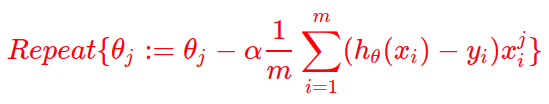

In [ ]:
import warnings
from matplotlib import pyplot as plt 

## 拦截异常
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
import math

data = [(0,0), (1,1), (2,1)]
# data = [(0,0), (1,0), (2,1), (3,0), (4,1)]
learning_rate = 0.1
w = [0, 0]
epochs = 200

def h(a, b, x):
    """预测函数"""
    return 1 / (1 + math.exp(-(a*x+b)))

def loss_a(a, b, x, y):
    """点(x,y)在参数a方向上的损失"""
    return (h(a, b, x) - y) * x

def loss_b(a, b, x, y):
    """点(x,y)在参数b方向上的损失"""
    return h(a, b, x) - y

def loss_ab(a, b):
    """所有点在参数a和参数b上的损失"""
    loss_a_all = [loss_a(a, b, x, y) for x, y in data]
    loss_b_all = [loss_b(a, b, x, y) for x, y in data]
    return [sum(loss_a_all)/len(loss_a_all), sum(loss_b_all)/len(loss_b_all)]

def update(a, b):
    """更新权重"""
    all_loss = loss_ab(a, b)
    return [a - learning_rate * all_loss[0], b - learning_rate * all_loss[1]]

def cal_loss(a, b):
    """计算在所有点上的损失"""
    all_loss = [y * math.log(h(a, b, x)) + (1-y) * math.log(1 - h(a, b, x)) for x, y in data]
    return - sum(all_loss) / len(all_loss)

all_loss = []
for epoch in range(epochs):
    w = update(w[0], w[1])
    loss = cal_loss(w[0], w[1])
    all_loss.append(loss)
    print("epoch: %03d, a: %.3f, b: %.3f, loss: %.4f" % (epoch, w[0], w[1], loss))
    
plt.plot(all_loss)

## 2. 使用sklearn的逻辑回归来解决分类问题

### 2.1 step1：先看看数据集

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = 'iris.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)

# 查看数据集的基本情况
df.info()

In [ ]:
# 查看数据集的前若干行
df.head()

In [ ]:
# 查看数值属性的摘要信息
df.describe()

In [ ]:
# 查看数据的分布
df.hist(bins=50, figsize=(20, 10))
plt.show()

### 2.2 相关性分析

In [ ]:
# 读取数据集
df = pd.read_csv(dataset_filename)

# 计算特征与目标的相关性
# 小数据集可以这样计算
corr = df.corr()
print(corr['target'].sort_values(ascending=False))

In [ ]:
# 相关性散点图
df.plot(kind='scatter', x='petal width (cm)', y='target', alpha=0.1)
plt.show()
df.plot(kind='scatter', x='sepal width (cm)', y='target', alpha=0.1)
plt.show()

### 2.3 评估指标

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(precision_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='macro'))

### 2.4 使用sklearn构建逻辑回归模型

#### 2.4.1 逻辑回归算法

其主要参数：

- penalty：在调参时如果我们主要的目的只是为了解决过拟合，一般penalty选择l2正则化就够了。但是如果选择l2正则化发现还是过拟合，即预测效果差的时候，就可以考虑l1正则化。另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用l1正则化。
- solver：solver参数决定了我们对逻辑回归损失函数的优化方法。newton-cg、sag和lbfgs求解算法只支持l2正则化(惩罚项)，对某些高维数据收敛更快
- max_iter：算法收敛最大迭代次数，仅在正则化优化算法为newton-cg, sag和lbfgs才有用
- multi_class：分类方式选择参数，ovr 即 one-vs-rest(OvR)，而 multinomial 即 many-vs-many(MvM)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def print_metres(true_y, pred_y):
    p, r, f1, _ = precision_recall_fscore_support(true_y, pred_y, average='macro')
    print("精确率: %.3f, 召回率: %.3f, F1值: %.3f" % (p, r, f1))
    return p, r, f1

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('iris.csv')
train_set, test_set = train_test_split(df, test_size=0.3)

# 先从一个特征变量开始
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

# 主要参数：
model = LogisticRegression()
model.fit(train_x, train_y)

# 模型评估
pred_y = model.predict(train_x)
print(train_y.shape, pred_y.shape)
print_metres(train_y, pred_y)

pred_y = model.predict(test_x)
print_metres(test_y, pred_y)

#### 2.4.2 随机梯度下降法
而sklearn中，LogisticRegression的实现方法是基于“liblinear”, “newton-cg”, “lbfgs” and “sag”这些库来实现的，当数据集特别大的时候，推荐使用SGDClassifier中的逻辑回归。

重要参数：

- loss	损失函数选择项，字符串型；默认为’hinge’即SVM；'log’为逻辑回归
- penalty	惩罚项（正则项）,字符串型；默认为’l2’;其余有’none’,‘l1’,‘elasticnet’
- alpha	惩罚参数,浮点型；默认值为0.0001
- max_iter	迭代次数，整数型；默认值为None
- learning_rate	学习率，字符串型；默认值为’optimal’，根据alpha计算得到

说明：SGDClassifier是一系列采用了梯度下降来求解参数的算法的集合，例如（SVM, logistic regression)等

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDClassifier?

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('iris.csv')
train_set, test_set = train_test_split(df, test_size=0.3)

# 先从一个特征变量开始
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])


def create_model(max_iter):
    # 为了能看到f1值随迭代次数的变化而变化，这里故意设置的常亮学习率
    model = SGDClassifier(loss='log', max_iter=max_iter, learning_rate='constant', eta0=1e-3)
    model.fit(train_x, train_y)

    # 模型评估
    pred_y = model.predict(train_x)
    _, _, train_f1 = print_metres(train_y, pred_y)

    pred_y = model.predict(test_x)
    _, _, test_f1 = print_metres(test_y, pred_y)
    return [train_f1, test_f1]

# 对比不同学习率下的f1值
all_f1 = []
for i in range(5, 100):
    max_iter = i
    f1 = create_model(max_iter)
    all_f1.append(f1)
    
Y = [
    [f1 for f1, _ in all_f1],
    [f1 for _, f1 in all_f1]
]
X = [i for i in range(5, 100)]
plt.ylim(0.5, 1)
plt.plot(X, Y[0], 'g-', label='训练')
plt.plot(X, Y[1], 'r-', label='测试')

## 3. 导入sklearn的内置数据集

sklearn内置的数据集其实有好几个，那都是机器学习的资源。如：

```
            load_digits()       load_files          load_sample_image   load_wine             
            load_boston         load_iris           load_sample_images                        
            load_breast_cancer  load_linnerud       load_svmlight_file                        
            load_diabetes       load_mlcomp         load_svmlight_files
```

如手写数字数据集：

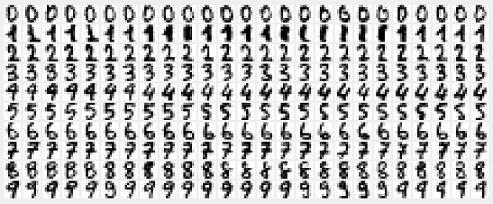

In [ ]:
from sklearn.datasets import load_digits

data = load_digits()
data

## 3. ROC曲线与AUC值

see more: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

# 导入数据并处理成二分类
iris = datasets.load_iris()
X = iris.data
y = iris.target
y[y == 2] = 0
print(X.shape)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = SGDClassifier(loss='log', max_iter=10, eta0=1e-3)

# 计算得分
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label=u'ROC曲线 (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()